In [4]:
import sys
venv_site_packages = "/Users/susan/MachineLearningProject/.venv/lib/python3.12/site-packages"

if venv_site_packages not in sys.path:
    sys.path.insert(0, venv_site_packages)

print(sys.path)


['/Users/susan/Desktop/MachineLearningProject/.venv/lib/python3.12/site-packages', '/Library/Frameworks/Python.framework/Versions/3.12/lib/python312.zip', '/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12', '/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/lib-dynload', '', '/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages']


In [5]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [6]:
data = pd.read_csv('conversion_data.csv')
data

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0
...,...,...,...,...,...,...
316195,US,26,1,Ads,9,0
316196,US,27,1,Direct,6,0
316197,China,25,0,Ads,4,0
316198,US,22,0,Seo,4,0


### Data Quality Check

In [7]:
data.dtypes

country                object
age                     int64
new_user                int64
source                 object
total_pages_visited     int64
converted               int64
dtype: object

In [8]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [9]:
data[data['age']>100]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


In [10]:
data_clean = data[data['age'] <= 100]

In [11]:
data_clean['country'].value_counts()

country
US         178092
China       76602
UK          48449
Germany     13055
Name: count, dtype: int64

In [12]:
data_clean['source'].value_counts()

source
Seo       155039
Ads        88739
Direct     72420
Name: count, dtype: int64

### EDA Questions: 

1. What's the conversion rate in different countries? 
2. What's the conversion rate in different age groups? 
3. Are return users easier to convert? 
4. Does source matter? 
5. Does number of page viewed affect the convert rate? 

#### Q1. What's the conversion rate in different countries?

In [13]:
data_clean.groupby(['country'])['converted'].mean()

country
China      0.001332
Germany    0.062428
UK         0.052612
US         0.037801
Name: converted, dtype: float64

<Axes: xlabel='country'>

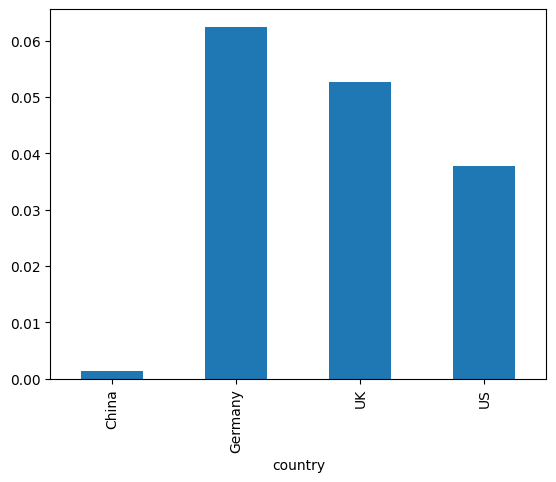

In [14]:
data_clean.groupby(['country'])['converted'].mean().plot.bar()

There are 76K users in China, but the conversion rate there is extremely low. 

#### Q2: What's the conversion rate in different age groups?

<Axes: >

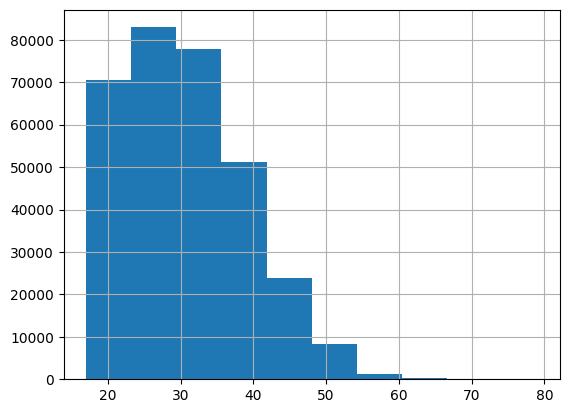

In [15]:
data_clean['age'].hist()

In [16]:
data_clean['age_group'] = pd.cut(data_clean['age'],
                                 bins = [17,25,35,45,100],
                                 labels= ['17-25','25-35','35-45','45+'])

/var/folders/k5/t9j09j4s5lbfwsk43_nfn_qh0000gn/T/ipykernel_34848/1174397989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['age_group'] = pd.cut(data_clean['age'],


In [17]:
data_clean['age_group'].value_counts()

age_group
25-35    134269
17-25     89394
35-45     69611
45+       15327
Name: count, dtype: int64

/var/folders/k5/t9j09j4s5lbfwsk43_nfn_qh0000gn/T/ipykernel_34848/1146933519.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_clean.groupby(['age_group'])['converted'].mean().plot.bar()


<Axes: xlabel='age_group'>

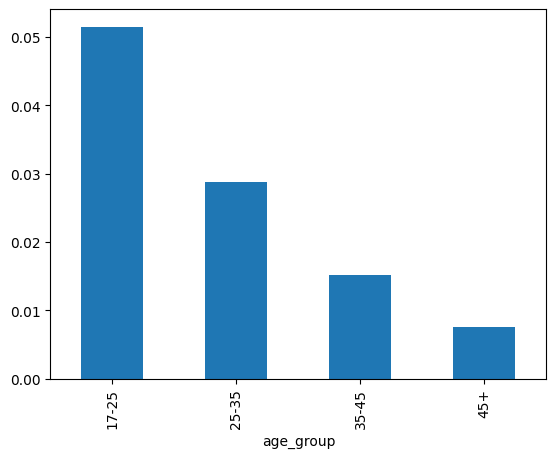

In [18]:
data_clean.groupby(['age_group'])['converted'].mean().plot.bar()

The conversion rate is highest among young people, despite the largest user group is 25-35.

#### Q3: Are return users easier to convert? 

In [19]:
data_clean['new_user'].value_counts()

new_user
1    216744
0     99454
Name: count, dtype: int64

In [20]:
data_clean.groupby(['new_user'])['converted'].mean()

new_user
0    0.071983
1    0.014021
Name: converted, dtype: float64

<Axes: xlabel='new_user'>

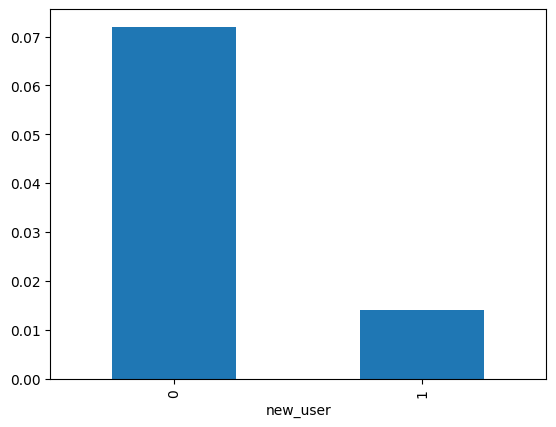

In [21]:
data_clean.groupby(['new_user'])['converted'].mean().plot.bar()

Yes, return users' conversion rate is a lot higher than new users. 

#### Q4: Does source matter?

In [22]:
data_clean.groupby(['source'])['converted'].mean()

source
Ads       0.034472
Direct    0.028169
Seo       0.032888
Name: converted, dtype: float64

<Axes: xlabel='source'>

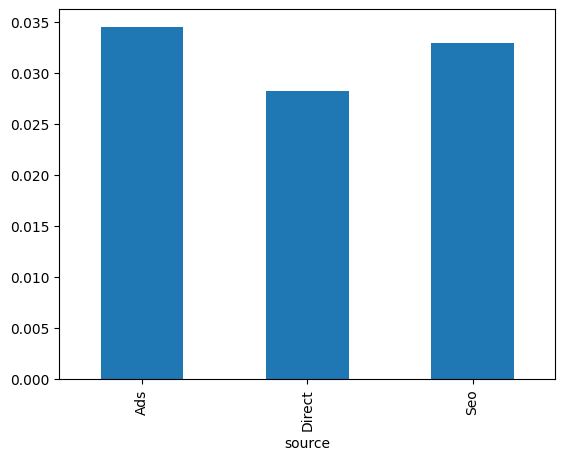

In [23]:
data_clean.groupby(['source'])['converted'].mean().plot.bar()

Looks like source doesn't matter that much in respect to conversion rate.

#### Q5: Does number of page viewed affect the convert rate? 

<Axes: xlabel='total_pages_visited'>

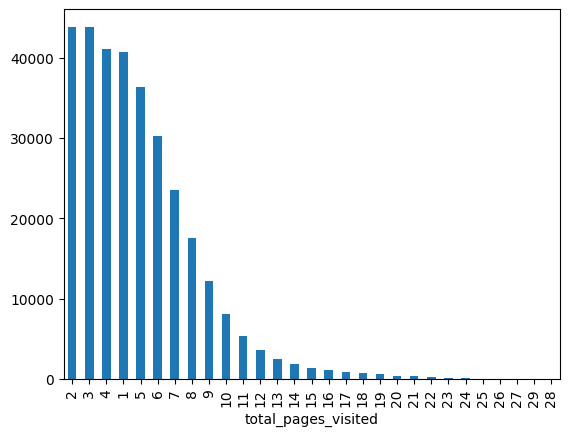

In [24]:
data_clean['total_pages_visited'].value_counts().plot.bar()

<Axes: xlabel='total_pages_visited'>

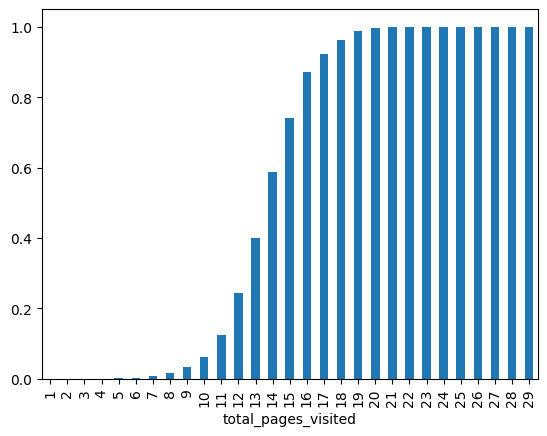

In [25]:
data_clean.groupby(['total_pages_visited'])['converted'].mean().plot.bar()

In general the more pages user visits, the higher probability users will convert.

### Predict Conversion
- Logistic regression 
- Decision tree
- Random forest 
- XGBoost

Model evluation metric: F1 score

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

In [27]:
data_model = pd.get_dummies(data_clean)

In [28]:
data_model.head()

,age,new_user,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo,age_group_17-25,age_group_25-35,age_group_35-45,age_group_45+
0,25,1,1,0,False,False,True,False,True,False,False,True,False,False,False
1,23,1,5,0,False,False,False,True,False,False,True,True,False,False,False
2,28,1,4,0,False,False,False,True,False,False,True,False,True,False,False
3,39,1,5,0,True,False,False,False,False,False,True,False,False,True,False
4,30,1,6,0,False,False,False,True,False,False,True,False,True,False,False


In [29]:
y = data_model['converted']
x = data_model.drop('converted', axis=1)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify = y, random_state=42)

### Model1: Logistic regression

In [31]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Text(0.5, 427.9555555555555, 'Predicted label')

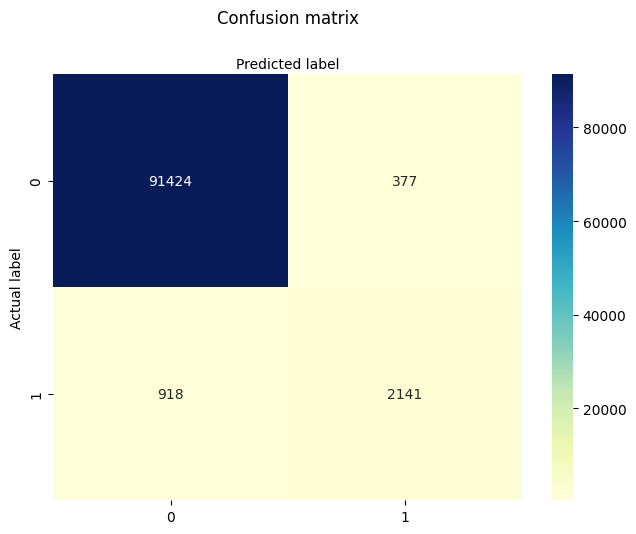

In [32]:
y_pred = logreg.predict(x_test)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [33]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('f1 score is: ',round(f1_score(y_test, y_pred),4))

[[91424   377]
 [  918  2141]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     91801
           1       0.85      0.70      0.77      3059

    accuracy                           0.99     94860
   macro avg       0.92      0.85      0.88     94860
weighted avg       0.99      0.99      0.99     94860

f1 score is:  0.7678


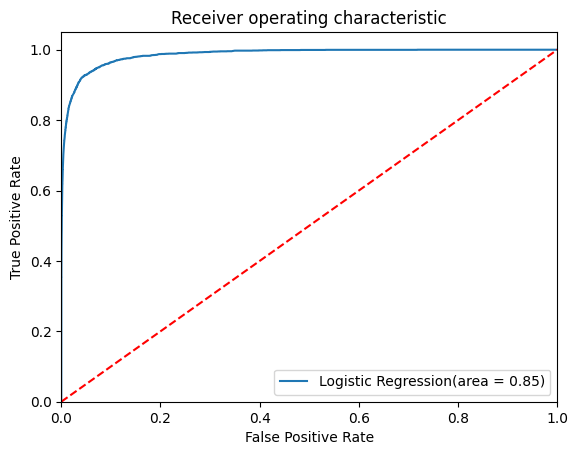

In [34]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Model2: Decision tree

In [35]:
depth = [3,4,5,6,7,8]
min_sample = [5,10,15,20,25,30]
obj = ['gini','entropy']
para = {'max_depth' : depth, 'min_samples_leaf':min_sample,'criterion' : obj}

In [36]:
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state = 1), para, cv=5,scoring = 'roc_auc')
grid_search_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [5, 10, 15, 20, 25, 30]},
             scoring='roc_auc')

In [37]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=20,
                       random_state=1)

In [38]:
# Train Decision Tree Classifer
decision_tree_clf = DecisionTreeClassifier(criterion = 'entropy', 
                                           random_state = 1, 
                                           max_depth = 7, 
                                           min_samples_leaf = 30).fit(x_train,y_train)

Text(0.5, 427.9555555555555, 'Predicted label')

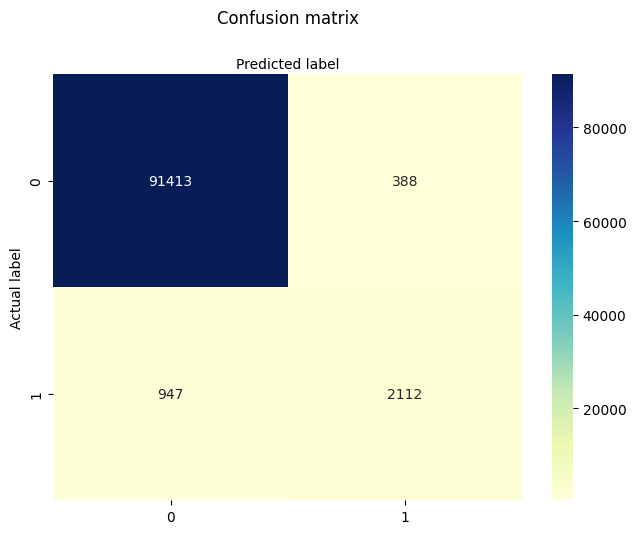

In [39]:
y_pred = decision_tree_clf.predict(x_test)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [40]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('f1 score is: ',round(f1_score(y_test, y_pred),4))

[[91413   388]
 [  947  2112]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     91801
           1       0.84      0.69      0.76      3059

    accuracy                           0.99     94860
   macro avg       0.92      0.84      0.88     94860
weighted avg       0.99      0.99      0.99     94860

f1 score is:  0.7598


### Model3: Random Forest

In [41]:
max_depth = [3,4,5,6,7]
min_sample_leaf = [5,10,15]
n_estimators = [30,50,100,200]
para = {'max_depth' : max_depth, 'min_samples_leaf':min_sample_leaf,'n_estimators' : n_estimators}

In [42]:
import sklearn
print(sklearn.__version__)



1.3.2


In [43]:
grid_search_cv = RandomizedSearchCV(
    XGBClassifier(),
    para,
    cv=3,
    n_iter=60,
    scoring='roc_auc',
    n_jobs=1,   # VERY IMPORTANT
    verbose=10
)
grid_search_cv.fit(x_train, y_train)


Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV 1/3; 1/60] START max_depth=3, min_samples_leaf=5, n_estimators=30...........
[CV 1/3; 1/60] END max_depth=3, min_samples_leaf=5, n_estimators=30;, score=0.985 total time=   0.1s
[CV 2/3; 1/60] START max_depth=3, min_samples_leaf=5, n_estimators=30...........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/3; 1/60] END max_depth=3, min_samples_leaf=5, n_estimators=30;, score=0.985 total time=   0.1s
[CV 3/3; 1/60] START max_depth=3, min_samples_leaf=5, n_estimators=30...........
[CV 3/3; 1/60] END max_depth=3, min_samples_leaf=5, n_estimators=30;, score=0.986 total time=   0.1s
[CV 1/3; 2/60] START max_depth=3, min_samples_leaf=5, n_estimators=50...........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/3; 2/60] END max_depth=3, min_samples_leaf=5, n_estimators=50;, score=0.985 total time=   0.1s
[CV 2/3; 2/60] START max_depth=3, min_samples_leaf=5, n_estimators=50...........
[CV 2/3; 2/60] END max_depth=3, min_samples_leaf=5, n_estimators=50;, score=0.985 total time=   0.1s
[CV 3/3; 2/60] START max_depth=3, min_samples_leaf=5, n_estimators=50...........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/3; 2/60] END max_depth=3, min_samples_leaf=5, n_estimators=50;, score=0.986 total time=   0.1s
[CV 1/3; 3/60] START max_depth=3, min_samples_leaf=5, n_estimators=100..........
[CV 1/3; 3/60] END max_depth=3, min_samples_leaf=5, n_estimators=100;, score=0.985 total time=   0.2s
[CV 2/3; 3/60] START max_depth=3, min_samples_leaf=5, n_estimators=100..........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/3; 3/60] END max_depth=3, min_samples_leaf=5, n_estimators=100;, score=0.986 total time=   0.2s
[CV 3/3; 3/60] START max_depth=3, min_samples_leaf=5, n_estimators=100..........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/3; 3/60] END max_depth=3, min_samples_leaf=5, n_estimators=100;, score=0.986 total time=   0.2s
[CV 1/3; 4/60] START max_depth=3, min_samples_leaf=5, n_estimators=200..........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/3; 4/60] END max_depth=3, min_samples_leaf=5, n_estimators=200;, score=0.985 total time=   0.4s
[CV 2/3; 4/60] START max_depth=3, min_samples_leaf=5, n_estimators=200..........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/3; 4/60] END max_depth=3, min_samples_leaf=5, n_estimators=200;, score=0.985 total time=   0.4s
[CV 3/3; 4/60] START max_depth=3, min_samples_leaf=5, n_estimators=200..........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/3; 4/60] END max_depth=3, min_samples_leaf=5, n_estimators=200;, score=0.985 total time=   0.4s
[CV 1/3; 5/60] START max_depth=3, min_samples_leaf=10, n_estimators=30..........
[CV 1/3; 5/60] END max_depth=3, min_samples_leaf=10, n_estimators=30;, score=0.985 total time=   0.1s
[CV 2/3; 5/60] START max_depth=3, min_samples_leaf=10, n_estimators=30..........
[CV 2/3; 5/60] END max_depth=3, min_samples_leaf=10, n_estimators=30;, score=0.985 total time=   0.1s
[CV 3/3; 5/60] START max_depth=3, min_samples_leaf=10, n_estimators=30..........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/3; 5/60] END max_depth=3, min_samples_leaf=10, n_estimators=30;, score=0.986 total time=   0.1s
[CV 1/3; 6/60] START max_depth=3, min_samples_leaf=10, n_estimators=50..........
[CV 1/3; 6/60] END max_depth=3, min_samples_leaf=10, n_estimators=50;, score=0.985 total time=   0.1s
[CV 2/3; 6/60] START max_depth=3, min_samples_leaf=10, n_estimators=50..........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/3; 6/60] END max_depth=3, min_samples_leaf=10, n_estimators=50;, score=0.985 total time=   0.1s
[CV 3/3; 6/60] START max_depth=3, min_samples_leaf=10, n_estimators=50..........
[CV 3/3; 6/60] END max_depth=3, min_samples_leaf=10, n_estimators=50;, score=0.986 total time=   0.1s
[CV 1/3; 7/60] START max_depth=3, min_samples_leaf=10, n_estimators=100.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/3; 7/60] END max_depth=3, min_samples_leaf=10, n_estimators=100;, score=0.985 total time=   0.2s
[CV 2/3; 7/60] START max_depth=3, min_samples_leaf=10, n_estimators=100.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/3; 7/60] END max_depth=3, min_samples_leaf=10, n_estimators=100;, score=0.986 total time=   0.2s
[CV 3/3; 7/60] START max_depth=3, min_samples_leaf=10, n_estimators=100.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/3; 7/60] END max_depth=3, min_samples_leaf=10, n_estimators=100;, score=0.986 total time=   0.2s
[CV 1/3; 8/60] START max_depth=3, min_samples_leaf=10, n_estimators=200.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/3; 8/60] END max_depth=3, min_samples_leaf=10, n_estimators=200;, score=0.985 total time=   0.4s
[CV 2/3; 8/60] START max_depth=3, min_samples_leaf=10, n_estimators=200.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/3; 8/60] END max_depth=3, min_samples_leaf=10, n_estimators=200;, score=0.985 total time=   0.4s
[CV 3/3; 8/60] START max_depth=3, min_samples_leaf=10, n_estimators=200.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/3; 8/60] END max_depth=3, min_samples_leaf=10, n_estimators=200;, score=0.985 total time=   0.4s
[CV 1/3; 9/60] START max_depth=3, min_samples_leaf=15, n_estimators=30..........
[CV 1/3; 9/60] END max_depth=3, min_samples_leaf=15, n_estimators=30;, score=0.985 total time=   0.1s
[CV 2/3; 9/60] START max_depth=3, min_samples_leaf=15, n_estimators=30..........
[CV 2/3; 9/60] END max_depth=3, min_samples_leaf=15, n_estimators=30;, score=0.985 total time=   0.1s
[CV 3/3; 9/60] START max_depth=3, min_samples_leaf=15, n_estimators=30..........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/3; 9/60] END max_depth=3, min_samples_leaf=15, n_estimators=30;, score=0.986 total time=   0.1s
[CV 1/3; 10/60] START max_depth=3, min_samples_leaf=15, n_estimators=50.........
[CV 1/3; 10/60] END max_depth=3, min_samples_leaf=15, n_estimators=50;, score=0.985 total time=   0.1s
[CV 2/3; 10/60] START max_depth=3, min_samples_leaf=15, n_estimators=50.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/3; 10/60] END max_depth=3, min_samples_leaf=15, n_estimators=50;, score=0.985 total time=   0.1s
[CV 3/3; 10/60] START max_depth=3, min_samples_leaf=15, n_estimators=50.........
[CV 3/3; 10/60] END max_depth=3, min_samples_leaf=15, n_estimators=50;, score=0.986 total time=   0.1s
[CV 1/3; 11/60] START max_depth=3, min_samples_leaf=15, n_estimators=100........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/3; 11/60] END max_depth=3, min_samples_leaf=15, n_estimators=100;, score=0.985 total time=   0.2s
[CV 2/3; 11/60] START max_depth=3, min_samples_leaf=15, n_estimators=100........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/3; 11/60] END max_depth=3, min_samples_leaf=15, n_estimators=100;, score=0.986 total time=   0.2s
[CV 3/3; 11/60] START max_depth=3, min_samples_leaf=15, n_estimators=100........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/3; 11/60] END max_depth=3, min_samples_leaf=15, n_estimators=100;, score=0.986 total time=   0.2s
[CV 1/3; 12/60] START max_depth=3, min_samples_leaf=15, n_estimators=200........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/3; 12/60] END max_depth=3, min_samples_leaf=15, n_estimators=200;, score=0.985 total time=   0.4s
[CV 2/3; 12/60] START max_depth=3, min_samples_leaf=15, n_estimators=200........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/3; 12/60] END max_depth=3, min_samples_leaf=15, n_estimators=200;, score=0.985 total time=   0.4s
[CV 3/3; 12/60] START max_depth=3, min_samples_leaf=15, n_estimators=200........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/3; 12/60] END max_depth=3, min_samples_leaf=15, n_estimators=200;, score=0.985 total time=   0.4s
[CV 1/3; 13/60] START max_depth=4, min_samples_leaf=5, n_estimators=30..........
[CV 1/3; 13/60] END max_depth=4, min_samples_leaf=5, n_estimators=30;, score=0.985 total time=   0.1s
[CV 2/3; 13/60] START max_depth=4, min_samples_leaf=5, n_estimators=30..........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/3; 13/60] END max_depth=4, min_samples_leaf=5, n_estimators=30;, score=0.984 total time=   0.1s
[CV 3/3; 13/60] START max_depth=4, min_samples_leaf=5, n_estimators=30..........
[CV 3/3; 13/60] END max_depth=4, min_samples_leaf=5, n_estimators=30;, score=0.986 total time=   0.1s
[CV 1/3; 14/60] START max_depth=4, min_samples_leaf=5, n_estimators=50..........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/3; 14/60] END max_depth=4, min_samples_leaf=5, n_estimators=50;, score=0.985 total time=   0.1s
[CV 2/3; 14/60] START max_depth=4, min_samples_leaf=5, n_estimators=50..........
[CV 2/3; 14/60] END max_depth=4, min_samples_leaf=5, n_estimators=50;, score=0.984 total time=   0.1s
[CV 3/3; 14/60] START max_depth=4, min_samples_leaf=5, n_estimators=50..........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/3; 14/60] END max_depth=4, min_samples_leaf=5, n_estimators=50;, score=0.986 total time=   0.1s
[CV 1/3; 15/60] START max_depth=4, min_samples_leaf=5, n_estimators=100.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/3; 15/60] END max_depth=4, min_samples_leaf=5, n_estimators=100;, score=0.985 total time=   0.2s
[CV 2/3; 15/60] START max_depth=4, min_samples_leaf=5, n_estimators=100.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/3; 15/60] END max_depth=4, min_samples_leaf=5, n_estimators=100;, score=0.985 total time=   0.2s
[CV 3/3; 15/60] START max_depth=4, min_samples_leaf=5, n_estimators=100.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/3; 15/60] END max_depth=4, min_samples_leaf=5, n_estimators=100;, score=0.985 total time=   0.2s
[CV 1/3; 16/60] START max_depth=4, min_samples_leaf=5, n_estimators=200.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/3; 16/60] END max_depth=4, min_samples_leaf=5, n_estimators=200;, score=0.985 total time=   0.4s
[CV 2/3; 16/60] START max_depth=4, min_samples_leaf=5, n_estimators=200.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/3; 16/60] END max_depth=4, min_samples_leaf=5, n_estimators=200;, score=0.985 total time=   0.4s
[CV 3/3; 16/60] START max_depth=4, min_samples_leaf=5, n_estimators=200.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/3; 16/60] END max_depth=4, min_samples_leaf=5, n_estimators=200;, score=0.984 total time=   0.4s
[CV 1/3; 17/60] START max_depth=4, min_samples_leaf=10, n_estimators=30.........
[CV 1/3; 17/60] END max_depth=4, min_samples_leaf=10, n_estimators=30;, score=0.985 total time=   0.1s
[CV 2/3; 17/60] START max_depth=4, min_samples_leaf=10, n_estimators=30.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/3; 17/60] END max_depth=4, min_samples_leaf=10, n_estimators=30;, score=0.984 total time=   0.1s
[CV 3/3; 17/60] START max_depth=4, min_samples_leaf=10, n_estimators=30.........
[CV 3/3; 17/60] END max_depth=4, min_samples_leaf=10, n_estimators=30;, score=0.986 total time=   0.1s
[CV 1/3; 18/60] START max_depth=4, min_samples_leaf=10, n_estimators=50.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/3; 18/60] END max_depth=4, min_samples_leaf=10, n_estimators=50;, score=0.985 total time=   0.1s
[CV 2/3; 18/60] START max_depth=4, min_samples_leaf=10, n_estimators=50.........
[CV 2/3; 18/60] END max_depth=4, min_samples_leaf=10, n_estimators=50;, score=0.984 total time=   0.1s
[CV 3/3; 18/60] START max_depth=4, min_samples_leaf=10, n_estimators=50.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/3; 18/60] END max_depth=4, min_samples_leaf=10, n_estimators=50;, score=0.986 total time=   0.1s
[CV 1/3; 19/60] START max_depth=4, min_samples_leaf=10, n_estimators=100........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/3; 19/60] END max_depth=4, min_samples_leaf=10, n_estimators=100;, score=0.985 total time=   0.2s
[CV 2/3; 19/60] START max_depth=4, min_samples_leaf=10, n_estimators=100........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/3; 19/60] END max_depth=4, min_samples_leaf=10, n_estimators=100;, score=0.985 total time=   0.2s
[CV 3/3; 19/60] START max_depth=4, min_samples_leaf=10, n_estimators=100........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/3; 19/60] END max_depth=4, min_samples_leaf=10, n_estimators=100;, score=0.985 total time=   0.2s
[CV 1/3; 20/60] START max_depth=4, min_samples_leaf=10, n_estimators=200........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/3; 20/60] END max_depth=4, min_samples_leaf=10, n_estimators=200;, score=0.985 total time=   0.4s
[CV 2/3; 20/60] START max_depth=4, min_samples_leaf=10, n_estimators=200........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/3; 20/60] END max_depth=4, min_samples_leaf=10, n_estimators=200;, score=0.985 total time=   0.4s
[CV 3/3; 20/60] START max_depth=4, min_samples_leaf=10, n_estimators=200........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/3; 20/60] END max_depth=4, min_samples_leaf=10, n_estimators=200;, score=0.984 total time=   0.4s
[CV 1/3; 21/60] START max_depth=4, min_samples_leaf=15, n_estimators=30.........
[CV 1/3; 21/60] END max_depth=4, min_samples_leaf=15, n_estimators=30;, score=0.985 total time=   0.1s
[CV 2/3; 21/60] START max_depth=4, min_samples_leaf=15, n_estimators=30.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/3; 21/60] END max_depth=4, min_samples_leaf=15, n_estimators=30;, score=0.984 total time=   0.1s
[CV 3/3; 21/60] START max_depth=4, min_samples_leaf=15, n_estimators=30.........
[CV 3/3; 21/60] END max_depth=4, min_samples_leaf=15, n_estimators=30;, score=0.986 total time=   0.1s
[CV 1/3; 22/60] START max_depth=4, min_samples_leaf=15, n_estimators=50.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/3; 22/60] END max_depth=4, min_samples_leaf=15, n_estimators=50;, score=0.985 total time=   0.1s
[CV 2/3; 22/60] START max_depth=4, min_samples_leaf=15, n_estimators=50.........
[CV 2/3; 22/60] END max_depth=4, min_samples_leaf=15, n_estimators=50;, score=0.984 total time=   0.1s
[CV 3/3; 22/60] START max_depth=4, min_samples_leaf=15, n_estimators=50.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/3; 22/60] END max_depth=4, min_samples_leaf=15, n_estimators=50;, score=0.986 total time=   0.1s
[CV 1/3; 23/60] START max_depth=4, min_samples_leaf=15, n_estimators=100........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/3; 23/60] END max_depth=4, min_samples_leaf=15, n_estimators=100;, score=0.985 total time=   0.2s
[CV 2/3; 23/60] START max_depth=4, min_samples_leaf=15, n_estimators=100........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/3; 23/60] END max_depth=4, min_samples_leaf=15, n_estimators=100;, score=0.985 total time=   0.2s
[CV 3/3; 23/60] START max_depth=4, min_samples_leaf=15, n_estimators=100........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/3; 23/60] END max_depth=4, min_samples_leaf=15, n_estimators=100;, score=0.985 total time=   0.2s
[CV 1/3; 24/60] START max_depth=4, min_samples_leaf=15, n_estimators=200........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/3; 24/60] END max_depth=4, min_samples_leaf=15, n_estimators=200;, score=0.985 total time=   0.4s
[CV 2/3; 24/60] START max_depth=4, min_samples_leaf=15, n_estimators=200........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/3; 24/60] END max_depth=4, min_samples_leaf=15, n_estimators=200;, score=0.985 total time=   0.4s
[CV 3/3; 24/60] START max_depth=4, min_samples_leaf=15, n_estimators=200........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/3; 24/60] END max_depth=4, min_samples_leaf=15, n_estimators=200;, score=0.984 total time=   0.5s
[CV 1/3; 25/60] START max_depth=5, min_samples_leaf=5, n_estimators=30..........
[CV 1/3; 25/60] END max_depth=5, min_samples_leaf=5, n_estimators=30;, score=0.985 total time=   0.1s
[CV 2/3; 25/60] START max_depth=5, min_samples_leaf=5, n_estimators=30..........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/3; 25/60] END max_depth=5, min_samples_leaf=5, n_estimators=30;, score=0.985 total time=   0.1s
[CV 3/3; 25/60] START max_depth=5, min_samples_leaf=5, n_estimators=30..........
[CV 3/3; 25/60] END max_depth=5, min_samples_leaf=5, n_estimators=30;, score=0.985 total time=   0.1s
[CV 1/3; 26/60] START max_depth=5, min_samples_leaf=5, n_estimators=50..........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/3; 26/60] END max_depth=5, min_samples_leaf=5, n_estimators=50;, score=0.985 total time=   0.2s
[CV 2/3; 26/60] START max_depth=5, min_samples_leaf=5, n_estimators=50..........
[CV 2/3; 26/60] END max_depth=5, min_samples_leaf=5, n_estimators=50;, score=0.985 total time=   0.2s
[CV 3/3; 26/60] START max_depth=5, min_samples_leaf=5, n_estimators=50..........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/3; 26/60] END max_depth=5, min_samples_leaf=5, n_estimators=50;, score=0.985 total time=   0.2s
[CV 1/3; 27/60] START max_depth=5, min_samples_leaf=5, n_estimators=100.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/3; 27/60] END max_depth=5, min_samples_leaf=5, n_estimators=100;, score=0.985 total time=   0.3s
[CV 2/3; 27/60] START max_depth=5, min_samples_leaf=5, n_estimators=100.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/3; 27/60] END max_depth=5, min_samples_leaf=5, n_estimators=100;, score=0.985 total time=   0.3s
[CV 3/3; 27/60] START max_depth=5, min_samples_leaf=5, n_estimators=100.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/3; 27/60] END max_depth=5, min_samples_leaf=5, n_estimators=100;, score=0.984 total time=   0.3s
[CV 1/3; 28/60] START max_depth=5, min_samples_leaf=5, n_estimators=200.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/3; 28/60] END max_depth=5, min_samples_leaf=5, n_estimators=200;, score=0.984 total time=   0.5s
[CV 2/3; 28/60] START max_depth=5, min_samples_leaf=5, n_estimators=200.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/3; 28/60] END max_depth=5, min_samples_leaf=5, n_estimators=200;, score=0.984 total time=   0.5s
[CV 3/3; 28/60] START max_depth=5, min_samples_leaf=5, n_estimators=200.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/3; 28/60] END max_depth=5, min_samples_leaf=5, n_estimators=200;, score=0.984 total time=   0.5s
[CV 1/3; 29/60] START max_depth=5, min_samples_leaf=10, n_estimators=30.........
[CV 1/3; 29/60] END max_depth=5, min_samples_leaf=10, n_estimators=30;, score=0.985 total time=   0.1s
[CV 2/3; 29/60] START max_depth=5, min_samples_leaf=10, n_estimators=30.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/3; 29/60] END max_depth=5, min_samples_leaf=10, n_estimators=30;, score=0.985 total time=   0.1s
[CV 3/3; 29/60] START max_depth=5, min_samples_leaf=10, n_estimators=30.........
[CV 3/3; 29/60] END max_depth=5, min_samples_leaf=10, n_estimators=30;, score=0.985 total time=   0.1s
[CV 1/3; 30/60] START max_depth=5, min_samples_leaf=10, n_estimators=50.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/3; 30/60] END max_depth=5, min_samples_leaf=10, n_estimators=50;, score=0.985 total time=   0.2s
[CV 2/3; 30/60] START max_depth=5, min_samples_leaf=10, n_estimators=50.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/3; 30/60] END max_depth=5, min_samples_leaf=10, n_estimators=50;, score=0.985 total time=   0.3s
[CV 3/3; 30/60] START max_depth=5, min_samples_leaf=10, n_estimators=50.........
[CV 3/3; 30/60] END max_depth=5, min_samples_leaf=10, n_estimators=50;, score=0.985 total time=   0.2s
[CV 1/3; 31/60] START max_depth=5, min_samples_leaf=10, n_estimators=100........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/3; 31/60] END max_depth=5, min_samples_leaf=10, n_estimators=100;, score=0.985 total time=   0.3s
[CV 2/3; 31/60] START max_depth=5, min_samples_leaf=10, n_estimators=100........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/3; 31/60] END max_depth=5, min_samples_leaf=10, n_estimators=100;, score=0.985 total time=   0.3s
[CV 3/3; 31/60] START max_depth=5, min_samples_leaf=10, n_estimators=100........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/3; 31/60] END max_depth=5, min_samples_leaf=10, n_estimators=100;, score=0.984 total time=   0.3s
[CV 1/3; 32/60] START max_depth=5, min_samples_leaf=10, n_estimators=200........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/3; 32/60] END max_depth=5, min_samples_leaf=10, n_estimators=200;, score=0.984 total time=   0.6s
[CV 2/3; 32/60] START max_depth=5, min_samples_leaf=10, n_estimators=200........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/3; 32/60] END max_depth=5, min_samples_leaf=10, n_estimators=200;, score=0.984 total time=   0.6s
[CV 3/3; 32/60] START max_depth=5, min_samples_leaf=10, n_estimators=200........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/3; 32/60] END max_depth=5, min_samples_leaf=10, n_estimators=200;, score=0.984 total time=   0.5s
[CV 1/3; 33/60] START max_depth=5, min_samples_leaf=15, n_estimators=30.........
[CV 1/3; 33/60] END max_depth=5, min_samples_leaf=15, n_estimators=30;, score=0.985 total time=   0.1s
[CV 2/3; 33/60] START max_depth=5, min_samples_leaf=15, n_estimators=30.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/3; 33/60] END max_depth=5, min_samples_leaf=15, n_estimators=30;, score=0.985 total time=   0.1s
[CV 3/3; 33/60] START max_depth=5, min_samples_leaf=15, n_estimators=30.........
[CV 3/3; 33/60] END max_depth=5, min_samples_leaf=15, n_estimators=30;, score=0.985 total time=   0.1s
[CV 1/3; 34/60] START max_depth=5, min_samples_leaf=15, n_estimators=50.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/3; 34/60] END max_depth=5, min_samples_leaf=15, n_estimators=50;, score=0.985 total time=   0.2s
[CV 2/3; 34/60] START max_depth=5, min_samples_leaf=15, n_estimators=50.........
[CV 2/3; 34/60] END max_depth=5, min_samples_leaf=15, n_estimators=50;, score=0.985 total time=   0.2s
[CV 3/3; 34/60] START max_depth=5, min_samples_leaf=15, n_estimators=50.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/3; 34/60] END max_depth=5, min_samples_leaf=15, n_estimators=50;, score=0.985 total time=   0.2s
[CV 1/3; 35/60] START max_depth=5, min_samples_leaf=15, n_estimators=100........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/3; 35/60] END max_depth=5, min_samples_leaf=15, n_estimators=100;, score=0.985 total time=   0.3s
[CV 2/3; 35/60] START max_depth=5, min_samples_leaf=15, n_estimators=100........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/3; 35/60] END max_depth=5, min_samples_leaf=15, n_estimators=100;, score=0.985 total time=   0.3s
[CV 3/3; 35/60] START max_depth=5, min_samples_leaf=15, n_estimators=100........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/3; 35/60] END max_depth=5, min_samples_leaf=15, n_estimators=100;, score=0.984 total time=   0.3s
[CV 1/3; 36/60] START max_depth=5, min_samples_leaf=15, n_estimators=200........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/3; 36/60] END max_depth=5, min_samples_leaf=15, n_estimators=200;, score=0.984 total time=   0.6s
[CV 2/3; 36/60] START max_depth=5, min_samples_leaf=15, n_estimators=200........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/3; 36/60] END max_depth=5, min_samples_leaf=15, n_estimators=200;, score=0.984 total time=   0.6s
[CV 3/3; 36/60] START max_depth=5, min_samples_leaf=15, n_estimators=200........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/3; 36/60] END max_depth=5, min_samples_leaf=15, n_estimators=200;, score=0.984 total time=   0.6s
[CV 1/3; 37/60] START max_depth=6, min_samples_leaf=5, n_estimators=30..........
[CV 1/3; 37/60] END max_depth=6, min_samples_leaf=5, n_estimators=30;, score=0.984 total time=   0.2s
[CV 2/3; 37/60] START max_depth=6, min_samples_leaf=5, n_estimators=30..........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/3; 37/60] END max_depth=6, min_samples_leaf=5, n_estimators=30;, score=0.985 total time=   0.2s
[CV 3/3; 37/60] START max_depth=6, min_samples_leaf=5, n_estimators=30..........
[CV 3/3; 37/60] END max_depth=6, min_samples_leaf=5, n_estimators=30;, score=0.985 total time=   0.2s
[CV 1/3; 38/60] START max_depth=6, min_samples_leaf=5, n_estimators=50..........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/3; 38/60] END max_depth=6, min_samples_leaf=5, n_estimators=50;, score=0.984 total time=   0.2s
[CV 2/3; 38/60] START max_depth=6, min_samples_leaf=5, n_estimators=50..........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/3; 38/60] END max_depth=6, min_samples_leaf=5, n_estimators=50;, score=0.985 total time=   0.3s
[CV 3/3; 38/60] START max_depth=6, min_samples_leaf=5, n_estimators=50..........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/3; 38/60] END max_depth=6, min_samples_leaf=5, n_estimators=50;, score=0.985 total time=   0.2s
[CV 1/3; 39/60] START max_depth=6, min_samples_leaf=5, n_estimators=100.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/3; 39/60] END max_depth=6, min_samples_leaf=5, n_estimators=100;, score=0.984 total time=   0.4s
[CV 2/3; 39/60] START max_depth=6, min_samples_leaf=5, n_estimators=100.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/3; 39/60] END max_depth=6, min_samples_leaf=5, n_estimators=100;, score=0.984 total time=   0.5s
[CV 3/3; 39/60] START max_depth=6, min_samples_leaf=5, n_estimators=100.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/3; 39/60] END max_depth=6, min_samples_leaf=5, n_estimators=100;, score=0.984 total time=   0.4s
[CV 1/3; 40/60] START max_depth=6, min_samples_leaf=5, n_estimators=200.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/3; 40/60] END max_depth=6, min_samples_leaf=5, n_estimators=200;, score=0.983 total time=   0.8s
[CV 2/3; 40/60] START max_depth=6, min_samples_leaf=5, n_estimators=200.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/3; 40/60] END max_depth=6, min_samples_leaf=5, n_estimators=200;, score=0.983 total time=   0.7s
[CV 3/3; 40/60] START max_depth=6, min_samples_leaf=5, n_estimators=200.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/3; 40/60] END max_depth=6, min_samples_leaf=5, n_estimators=200;, score=0.983 total time=   0.6s
[CV 1/3; 41/60] START max_depth=6, min_samples_leaf=10, n_estimators=30.........
[CV 1/3; 41/60] END max_depth=6, min_samples_leaf=10, n_estimators=30;, score=0.984 total time=   0.1s
[CV 2/3; 41/60] START max_depth=6, min_samples_leaf=10, n_estimators=30.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/3; 41/60] END max_depth=6, min_samples_leaf=10, n_estimators=30;, score=0.985 total time=   0.1s
[CV 3/3; 41/60] START max_depth=6, min_samples_leaf=10, n_estimators=30.........
[CV 3/3; 41/60] END max_depth=6, min_samples_leaf=10, n_estimators=30;, score=0.985 total time=   0.1s
[CV 1/3; 42/60] START max_depth=6, min_samples_leaf=10, n_estimators=50.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/3; 42/60] END max_depth=6, min_samples_leaf=10, n_estimators=50;, score=0.984 total time=   0.2s
[CV 2/3; 42/60] START max_depth=6, min_samples_leaf=10, n_estimators=50.........
[CV 2/3; 42/60] END max_depth=6, min_samples_leaf=10, n_estimators=50;, score=0.985 total time=   0.2s
[CV 3/3; 42/60] START max_depth=6, min_samples_leaf=10, n_estimators=50.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/3; 42/60] END max_depth=6, min_samples_leaf=10, n_estimators=50;, score=0.985 total time=   0.2s
[CV 1/3; 43/60] START max_depth=6, min_samples_leaf=10, n_estimators=100........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/3; 43/60] END max_depth=6, min_samples_leaf=10, n_estimators=100;, score=0.984 total time=   0.3s
[CV 2/3; 43/60] START max_depth=6, min_samples_leaf=10, n_estimators=100........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/3; 43/60] END max_depth=6, min_samples_leaf=10, n_estimators=100;, score=0.984 total time=   0.3s
[CV 3/3; 43/60] START max_depth=6, min_samples_leaf=10, n_estimators=100........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/3; 43/60] END max_depth=6, min_samples_leaf=10, n_estimators=100;, score=0.984 total time=   0.3s
[CV 1/3; 44/60] START max_depth=6, min_samples_leaf=10, n_estimators=200........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/3; 44/60] END max_depth=6, min_samples_leaf=10, n_estimators=200;, score=0.983 total time=   0.6s
[CV 2/3; 44/60] START max_depth=6, min_samples_leaf=10, n_estimators=200........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/3; 44/60] END max_depth=6, min_samples_leaf=10, n_estimators=200;, score=0.983 total time=   0.6s
[CV 3/3; 44/60] START max_depth=6, min_samples_leaf=10, n_estimators=200........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/3; 44/60] END max_depth=6, min_samples_leaf=10, n_estimators=200;, score=0.983 total time=   0.6s
[CV 1/3; 45/60] START max_depth=6, min_samples_leaf=15, n_estimators=30.........
[CV 1/3; 45/60] END max_depth=6, min_samples_leaf=15, n_estimators=30;, score=0.984 total time=   0.1s
[CV 2/3; 45/60] START max_depth=6, min_samples_leaf=15, n_estimators=30.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/3; 45/60] END max_depth=6, min_samples_leaf=15, n_estimators=30;, score=0.985 total time=   0.1s
[CV 3/3; 45/60] START max_depth=6, min_samples_leaf=15, n_estimators=30.........
[CV 3/3; 45/60] END max_depth=6, min_samples_leaf=15, n_estimators=30;, score=0.985 total time=   0.1s
[CV 1/3; 46/60] START max_depth=6, min_samples_leaf=15, n_estimators=50.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/3; 46/60] END max_depth=6, min_samples_leaf=15, n_estimators=50;, score=0.984 total time=   0.2s
[CV 2/3; 46/60] START max_depth=6, min_samples_leaf=15, n_estimators=50.........
[CV 2/3; 46/60] END max_depth=6, min_samples_leaf=15, n_estimators=50;, score=0.985 total time=   0.2s
[CV 3/3; 46/60] START max_depth=6, min_samples_leaf=15, n_estimators=50.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/3; 46/60] END max_depth=6, min_samples_leaf=15, n_estimators=50;, score=0.985 total time=   0.2s
[CV 1/3; 47/60] START max_depth=6, min_samples_leaf=15, n_estimators=100........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/3; 47/60] END max_depth=6, min_samples_leaf=15, n_estimators=100;, score=0.984 total time=   0.3s
[CV 2/3; 47/60] START max_depth=6, min_samples_leaf=15, n_estimators=100........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/3; 47/60] END max_depth=6, min_samples_leaf=15, n_estimators=100;, score=0.984 total time=   0.3s
[CV 3/3; 47/60] START max_depth=6, min_samples_leaf=15, n_estimators=100........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/3; 47/60] END max_depth=6, min_samples_leaf=15, n_estimators=100;, score=0.984 total time=   0.4s
[CV 1/3; 48/60] START max_depth=6, min_samples_leaf=15, n_estimators=200........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/3; 48/60] END max_depth=6, min_samples_leaf=15, n_estimators=200;, score=0.983 total time=   0.6s
[CV 2/3; 48/60] START max_depth=6, min_samples_leaf=15, n_estimators=200........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/3; 48/60] END max_depth=6, min_samples_leaf=15, n_estimators=200;, score=0.983 total time=   0.6s
[CV 3/3; 48/60] START max_depth=6, min_samples_leaf=15, n_estimators=200........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/3; 48/60] END max_depth=6, min_samples_leaf=15, n_estimators=200;, score=0.983 total time=   0.6s
[CV 1/3; 49/60] START max_depth=7, min_samples_leaf=5, n_estimators=30..........
[CV 1/3; 49/60] END max_depth=7, min_samples_leaf=5, n_estimators=30;, score=0.985 total time=   0.1s
[CV 2/3; 49/60] START max_depth=7, min_samples_leaf=5, n_estimators=30..........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/3; 49/60] END max_depth=7, min_samples_leaf=5, n_estimators=30;, score=0.984 total time=   0.1s
[CV 3/3; 49/60] START max_depth=7, min_samples_leaf=5, n_estimators=30..........
[CV 3/3; 49/60] END max_depth=7, min_samples_leaf=5, n_estimators=30;, score=0.985 total time=   0.1s
[CV 1/3; 50/60] START max_depth=7, min_samples_leaf=5, n_estimators=50..........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/3; 50/60] END max_depth=7, min_samples_leaf=5, n_estimators=50;, score=0.984 total time=   0.2s
[CV 2/3; 50/60] START max_depth=7, min_samples_leaf=5, n_estimators=50..........
[CV 2/3; 50/60] END max_depth=7, min_samples_leaf=5, n_estimators=50;, score=0.984 total time=   0.2s
[CV 3/3; 50/60] START max_depth=7, min_samples_leaf=5, n_estimators=50..........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/3; 50/60] END max_depth=7, min_samples_leaf=5, n_estimators=50;, score=0.984 total time=   0.2s
[CV 1/3; 51/60] START max_depth=7, min_samples_leaf=5, n_estimators=100.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/3; 51/60] END max_depth=7, min_samples_leaf=5, n_estimators=100;, score=0.983 total time=   0.4s
[CV 2/3; 51/60] START max_depth=7, min_samples_leaf=5, n_estimators=100.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/3; 51/60] END max_depth=7, min_samples_leaf=5, n_estimators=100;, score=0.984 total time=   0.4s
[CV 3/3; 51/60] START max_depth=7, min_samples_leaf=5, n_estimators=100.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/3; 51/60] END max_depth=7, min_samples_leaf=5, n_estimators=100;, score=0.984 total time=   0.3s
[CV 1/3; 52/60] START max_depth=7, min_samples_leaf=5, n_estimators=200.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/3; 52/60] END max_depth=7, min_samples_leaf=5, n_estimators=200;, score=0.982 total time=   0.7s
[CV 2/3; 52/60] START max_depth=7, min_samples_leaf=5, n_estimators=200.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/3; 52/60] END max_depth=7, min_samples_leaf=5, n_estimators=200;, score=0.983 total time=   0.7s
[CV 3/3; 52/60] START max_depth=7, min_samples_leaf=5, n_estimators=200.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/3; 52/60] END max_depth=7, min_samples_leaf=5, n_estimators=200;, score=0.983 total time=   0.7s
[CV 1/3; 53/60] START max_depth=7, min_samples_leaf=10, n_estimators=30.........
[CV 1/3; 53/60] END max_depth=7, min_samples_leaf=10, n_estimators=30;, score=0.985 total time=   0.1s
[CV 2/3; 53/60] START max_depth=7, min_samples_leaf=10, n_estimators=30.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/3; 53/60] END max_depth=7, min_samples_leaf=10, n_estimators=30;, score=0.984 total time=   0.1s
[CV 3/3; 53/60] START max_depth=7, min_samples_leaf=10, n_estimators=30.........
[CV 3/3; 53/60] END max_depth=7, min_samples_leaf=10, n_estimators=30;, score=0.985 total time=   0.1s
[CV 1/3; 54/60] START max_depth=7, min_samples_leaf=10, n_estimators=50.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/3; 54/60] END max_depth=7, min_samples_leaf=10, n_estimators=50;, score=0.984 total time=   0.2s
[CV 2/3; 54/60] START max_depth=7, min_samples_leaf=10, n_estimators=50.........
[CV 2/3; 54/60] END max_depth=7, min_samples_leaf=10, n_estimators=50;, score=0.984 total time=   0.2s
[CV 3/3; 54/60] START max_depth=7, min_samples_leaf=10, n_estimators=50.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/3; 54/60] END max_depth=7, min_samples_leaf=10, n_estimators=50;, score=0.984 total time=   0.2s
[CV 1/3; 55/60] START max_depth=7, min_samples_leaf=10, n_estimators=100........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/3; 55/60] END max_depth=7, min_samples_leaf=10, n_estimators=100;, score=0.983 total time=   0.4s
[CV 2/3; 55/60] START max_depth=7, min_samples_leaf=10, n_estimators=100........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/3; 55/60] END max_depth=7, min_samples_leaf=10, n_estimators=100;, score=0.984 total time=   0.4s
[CV 3/3; 55/60] START max_depth=7, min_samples_leaf=10, n_estimators=100........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/3; 55/60] END max_depth=7, min_samples_leaf=10, n_estimators=100;, score=0.984 total time=   0.4s
[CV 1/3; 56/60] START max_depth=7, min_samples_leaf=10, n_estimators=200........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/3; 56/60] END max_depth=7, min_samples_leaf=10, n_estimators=200;, score=0.982 total time=   0.7s
[CV 2/3; 56/60] START max_depth=7, min_samples_leaf=10, n_estimators=200........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/3; 56/60] END max_depth=7, min_samples_leaf=10, n_estimators=200;, score=0.983 total time=   0.7s
[CV 3/3; 56/60] START max_depth=7, min_samples_leaf=10, n_estimators=200........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:44:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/3; 56/60] END max_depth=7, min_samples_leaf=10, n_estimators=200;, score=0.983 total time=   0.7s
[CV 1/3; 57/60] START max_depth=7, min_samples_leaf=15, n_estimators=30.........
[CV 1/3; 57/60] END max_depth=7, min_samples_leaf=15, n_estimators=30;, score=0.985 total time=   0.1s
[CV 2/3; 57/60] START max_depth=7, min_samples_leaf=15, n_estimators=30.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:45:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:45:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/3; 57/60] END max_depth=7, min_samples_leaf=15, n_estimators=30;, score=0.984 total time=   0.1s
[CV 3/3; 57/60] START max_depth=7, min_samples_leaf=15, n_estimators=30.........
[CV 3/3; 57/60] END max_depth=7, min_samples_leaf=15, n_estimators=30;, score=0.985 total time=   0.1s
[CV 1/3; 58/60] START max_depth=7, min_samples_leaf=15, n_estimators=50.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:45:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:45:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/3; 58/60] END max_depth=7, min_samples_leaf=15, n_estimators=50;, score=0.984 total time=   0.2s
[CV 2/3; 58/60] START max_depth=7, min_samples_leaf=15, n_estimators=50.........
[CV 2/3; 58/60] END max_depth=7, min_samples_leaf=15, n_estimators=50;, score=0.984 total time=   0.2s
[CV 3/3; 58/60] START max_depth=7, min_samples_leaf=15, n_estimators=50.........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:45:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:45:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/3; 58/60] END max_depth=7, min_samples_leaf=15, n_estimators=50;, score=0.984 total time=   0.2s
[CV 1/3; 59/60] START max_depth=7, min_samples_leaf=15, n_estimators=100........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:45:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/3; 59/60] END max_depth=7, min_samples_leaf=15, n_estimators=100;, score=0.983 total time=   0.4s
[CV 2/3; 59/60] START max_depth=7, min_samples_leaf=15, n_estimators=100........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:45:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/3; 59/60] END max_depth=7, min_samples_leaf=15, n_estimators=100;, score=0.984 total time=   0.4s
[CV 3/3; 59/60] START max_depth=7, min_samples_leaf=15, n_estimators=100........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:45:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/3; 59/60] END max_depth=7, min_samples_leaf=15, n_estimators=100;, score=0.984 total time=   0.4s
[CV 1/3; 60/60] START max_depth=7, min_samples_leaf=15, n_estimators=200........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:45:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/3; 60/60] END max_depth=7, min_samples_leaf=15, n_estimators=200;, score=0.982 total time=   0.7s
[CV 2/3; 60/60] START max_depth=7, min_samples_leaf=15, n_estimators=200........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:45:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/3; 60/60] END max_depth=7, min_samples_leaf=15, n_estimators=200;, score=0.983 total time=   0.7s
[CV 3/3; 60/60] START max_depth=7, min_samples_leaf=15, n_estimators=200........


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:45:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/3; 60/60] END max_depth=7, min_samples_leaf=15, n_estimators=200;, score=0.983 total time=   0.7s


/Users/susan/Desktop/MLclean/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [14:45:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=60, n_jobs=1,
                   param_distributions={'max_depth': [3, 4, 5, 6, 7],
                                        'min_samples_leaf': [5, 10, 15],
                                        'n_estimators': [30, 50, 100, 200]},
                   scoring='roc_auc', verbose=10)

In [44]:
grid_search_cv.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, min_samples_leaf=5,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=50, n_jobs=None, ...)

In [45]:
# Train Decision Tree Classifer
random_forest_clf = RandomForestClassifier(max_depth = 7, 
                                           min_samples_leaf = 10,
                                           n_estimators = 200).fit(x_train,y_train)

Text(0.5, 427.9555555555555, 'Predicted label')

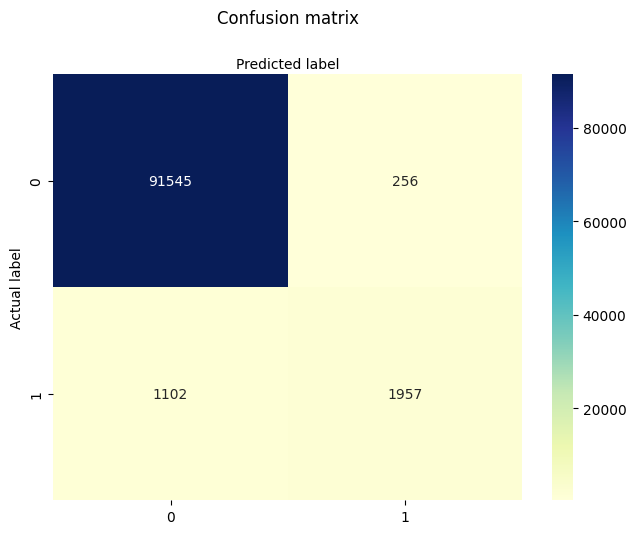

In [46]:
y_pred = random_forest_clf.predict(x_test)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [47]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('f1 score is: ',round(f1_score(y_test, y_pred),4))

[[91545   256]
 [ 1102  1957]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     91801
           1       0.88      0.64      0.74      3059

    accuracy                           0.99     94860
   macro avg       0.94      0.82      0.87     94860
weighted avg       0.98      0.99      0.98     94860

f1 score is:  0.7424


### Model4: XGBoost

In [48]:
max_depth = [3,4,5,6,7]
subsample = [0.5,0.6,0.7,0.8,0.9,1]
min_child_weight = [3,4,5,6,7]
n_estimators = [30,50,100,200,300,400,500]
para = {'max_depth' : max_depth, 'subsample':subsample,'min_child_weight':min_child_weight,
        'n_estimators':n_estimators}

In [49]:
grid_search_cv = RandomizedSearchCV(XGBClassifier(), para, cv=3, n_iter = 100,
                                    scoring = 'roc_auc',n_jobs = -1,verbose = 10)
grid_search_cv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3; 3/100] START max_depth=3, min_child_weight=4, n_estimators=100, subsample=0.5
[CV 1/3; 2/100] START max_depth=6, min_child_weight=5, n_estimators=50, subsample=0.6
[CV 2/3; 2/100] START max_depth=6, min_child_weight=5, n_estimators=50, subsample=0.6
[CV 1/3; 1/100] START max_depth=6, min_child_weight=7, n_estimators=100, subsample=0.9
[CV 3/3; 1/100] START max_depth=6, min_child_weight=7, n_estimators=100, subsample=0.9
[CV 2/3; 1/100] START max_depth=6, min_child_weight=7, n_estimators=100, subsample=0.9
[CV 3/3; 2/100] START max_depth=6, min_child_weight=5, n_estimators=50, subsample=0.6
[CV 2/3; 3/100] START max_depth=3, min_child_weight=4, n_estimators=100, subsample=0.5
[CV 1/3; 2/100] END max_depth=6, min_child_weight=5, n_estimators=50, subsample=0.6;, score=0.985 total time=   0.8s
[CV 3/3; 2/100] END max_depth=6, min_child_weight=5, n_estimators=50, subsample=0.6;, score=0.985 total time=   0.8s
[CV 3/3; 3

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [3, 4, 5, 6, 7],
                                        'min_child_weight': [3, 4, 5, 6, 7],
                                        'n_estimators': [30, 50, 100, 200, 300,
                                                         400, 500],
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9,
                                                      1]},
                   scoring='roc_auc', verbose=10)

In [50]:
grid_search_cv.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, ...)

In [51]:
xgboost_model = XGBClassifier(max_depth = 3,
                              subsample = 0.9,
                              min_child_weight = 6,
                              n_estimators = 50,
                              random_state = 12345)
xgboost_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=6, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, ...)

In [52]:
print(xgboost_model.score(x_train, y_train))
print(xgboost_model.score(x_test, y_test))

0.9861478824241657
0.9861690912924309


Text(0.5, 427.9555555555555, 'Predicted label')

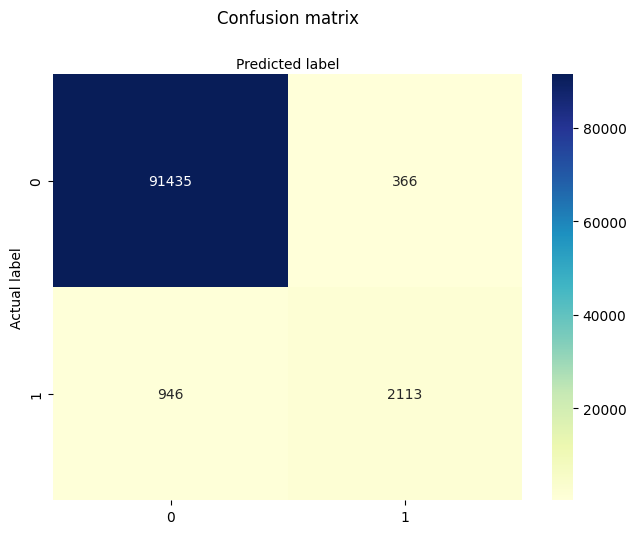

In [53]:
y_pred = xgboost_model.predict(x_test)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [54]:
from sklearn.metrics import f1_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('f1 score is: ',round(f1_score(y_test, y_pred),4))

[[91435   366]
 [  946  2113]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     91801
           1       0.85      0.69      0.76      3059

    accuracy                           0.99     94860
   macro avg       0.92      0.84      0.88     94860
weighted avg       0.99      0.99      0.99     94860

f1 score is:  0.7631


#### Insights and recommendations: 
- Conversion rate in China is VERY low. Need to figure out why. 
- The site needs to attract more young people as it has higher conversion rate. Meanwhile figuring out why conversion becomes lower for older people. 
- More page views and existing users are key predictors identified by the model.Therefore, 
    - We can send e-mail about new product or promotions to increase customer rentention (bring more customers back). 
    - We can send customers remainders  / coupons if he/she viewed a lot of pages already but hasn't converted. 